# **Applied Natural Language Processing**
# **AT2**

## **HD Innovators**

1. Setting up the initial environment
2. Exploring the dataset
3. Data preparation
4. Analysing text using VADER sentiment analysis
5. Analysing text using Transformers RoBERTa model

## **1. Setting up the initial environment**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import seaborn as sns
import nltk
import re
import spacy
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /Users/mcyaputra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mcyaputra/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## **2. Exploring the dataset**

**2.1 Loading dataset**

In [2]:
#Loading dataset
df = pd.read_csv('lyrics_processed.csv')

In [3]:
#Showing the first 10 rows of the dataset
df.head(10)

,Unnamed: 0,artist_name,track_name,lyrics,release_date,genre,tokenized,cleaned_stopwords,pos_tags,lyrics_lemmatized
0,0,jd mcpherson,i can't complain,heart gang little catch couple fish water swis...,2011,blues,"['heart', 'gang', 'little', 'catch', 'couple',...","['heart', 'gang', 'little', 'catch', 'couple',...","[('heart', 'n'), ('gang', 'n'), ('little', 'a'...",heart gang little catch couple fish water swis...
1,1,the marshall tucker band,change is gonna come,time dream money fear grow time come think lea...,1978,blues,"['time', 'dream', 'money', 'fear', 'grow', 'ti...","['time', 'dream', 'money', 'fear', 'grow', 'ti...","[('time', 'n'), ('dream', 'n'), ('money', 'n')...",time dream money fear grow time come think lea...
2,2,dinah washington,blue gardenia,blue gardenia blue toss aside like gardenia ne...,1955,blues,"['blue', 'gardenia', 'blue', 'toss', 'aside', ...","['blue', 'gardenia', 'blue', 'toss', 'aside', ...","[('blue', 'a'), ('gardenia', 'n'), ('blue', 'n...",blue gardenia blue toss aside like gardenia ne...
3,3,jimi hendrix,burning of the midnight lamp,morning dead leave lead moon loneliness felt t...,1968,blues,"['morning', 'dead', 'leave', 'lead', 'moon', '...","['morning', 'dead', 'leave', 'lead', 'moon', '...","[('morning', 'n'), ('dead', 'a'), ('leave', 'v...",morning dead leave lead moon loneliness felt t...
4,4,graveyard,ungrateful are the dead,bury darkness free thoughts happiness reach us...,2011,blues,"['bury', 'darkness', 'free', 'thoughts', 'happ...","['bury', 'darkness', 'free', 'thoughts', 'happ...","[('bury', 'n'), ('darkness', 'n'), ('free', 'a...",bury darkness free thought happiness reach usu...
5,5,the gun club,my dreams,hear intrude dream hate appearance give right ...,1984,blues,"['hear', 'intrude', 'dream', 'hate', 'appearan...","['hear', 'intrude', 'dream', 'hate', 'appearan...","[('hear', 'a'), ('intrude', 'a'), ('dream', 'n...",hear intrude dream hate appearance give right ...
6,6,the vaughan brothers,long way from home,look look look look matter want cause night fa...,1990,blues,"['look', 'look', 'look', 'look', 'matter', 'wa...","['look', 'look', 'look', 'look', 'matter', 'wa...","[('look', 'n'), ('look', 'v'), ('look', 'v'), ...",look look look look matter want cause night fa...
7,7,muddy waters,"hey, hey",muddy fuck water mixtape high bitch motherfuck...,1960,blues,"['muddy', 'fuck', 'water', 'mixtape', 'high', ...","['muddy', 'fuck', 'water', 'mixtape', 'high', ...","[('muddy', 'a'), ('fuck', 'a'), ('water', 'n')...",muddy fuck water mixtape high bitch motherfuck...
8,8,phoebe snow,something so right,cool water fever run high look lovelight eye c...,1974,blues,"['cool', 'water', 'fever', 'run', 'high', 'loo...","['cool', 'water', 'fever', 'run', 'high', 'loo...","[('cool', 'a'), ('water', 'n'), ('fever', 'n')...",cool water fever run high look lovelight eye c...
9,9,aretha franklin,"i surrender, dear",play game stay away cost surrender dear proud ...,1962,blues,"['play', 'game', 'stay', 'away', 'cost', 'surr...","['play', 'game', 'stay', 'away', 'cost', 'surr...","[('play', 'n'), ('game', 'n'), ('stay', 'v'), ...",play game stay away cost surrender dear proud ...


In [4]:
df2 = pd.read_csv('lyrics_all_combined.csv')

In [5]:
df2.head(10)

,artist_name,track_name,lyrics,release_date,genre
0,cage the elephant,what i'm becoming,slowly drift floor escape mind feel like move ...,2019,blues
1,the raconteurs,don't bother me,bother bother bother bother hide agenda bother...,2019,blues
2,jd mcpherson,i can't complain,heart gang little catch couple fish water swis...,2011,blues
3,the marshall tucker band,change is gonna come,time dream money fear grow time come think lea...,1978,blues
4,dinah washington,blue gardenia,blue gardenia blue toss aside like gardenia ne...,1955,blues
5,jimi hendrix,burning of the midnight lamp,morning dead leave lead moon loneliness felt t...,1968,blues
6,graveyard,ungrateful are the dead,bury darkness free thoughts happiness reach us...,2011,blues
7,the gun club,my dreams,hear intrude dream hate appearance give right ...,1984,blues
8,the vaughan brothers,long way from home,look look look look matter want cause night fa...,1990,blues
9,muddy waters,"hey, hey",muddy fuck water mixtape high bitch motherfuck...,1960,blues


In [5]:
#Showing total rows and columns in the dataset
df.shape

(1608, 4)

In [6]:
#Displaying additional information including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   artist    1608 non-null   object
 1   title     1608 non-null   object
 2   cleaned_  1603 non-null   object
 3   Genre     1608 non-null   object
dtypes: object(4)
memory usage: 50.4+ KB


There are 5 missing values in 'cleaned_' column

**2.2 Checking for missing values**

In [7]:
#Dropping missing values from the dataset
df = df.dropna()

In [8]:
#Displaying remaining rows after missing values are removed
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603 entries, 0 to 1607
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   artist    1603 non-null   object
 1   title     1603 non-null   object
 2   cleaned_  1603 non-null   object
 3   Genre     1603 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB


**2.3 WordCloud**

<function matplotlib.pyplot.show(close=None, block=None)>

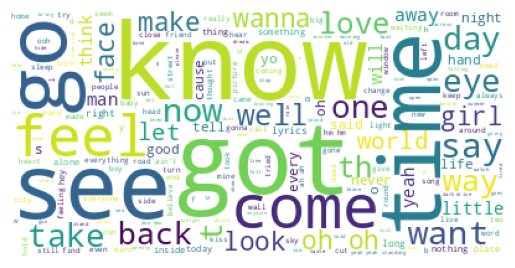

In [9]:
#Converting text to string
sentence_df = df['cleaned_'].to_string()

#Showing most frequent words using word cloud
word_cloud = WordCloud(background_color = 'white').generate(sentence_df)
plt.imshow(word_cloud)
plt.axis('off')
plt.show

**2.4 Top 20 most frequent words**

In [10]:
#Import Counter library
from collections import Counter

#Calculating 10 most common words
Counter(" ".join(df["cleaned_"]).split()).most_common(20)

[('the', 15149),
 ('i', 13354),
 ('you', 12895),
 ('and', 8654),
 ('to', 8572),
 ('a', 7527),
 ('it', 5612),
 ('me', 5568),
 ('in', 5163),
 ('my', 4613),
 ('of', 3915),
 ('on', 3623),
 ('your', 3588),
 ("i'm", 3300),
 ('all', 3030),
 ('that', 2880),
 ('is', 2814),
 ("don't", 2811),
 ("it's", 2581),
 ('like', 2516)]

Majority of the top 20 most frequent words are stop words, we will need to clean the text before further analysis can be done

## **3. Data Preparation**

**3.1 Converting text to lowercase**

In [11]:
#Defining a function to lowercase text
def lower(text):
  #Make text lowercase
  text = text.lower()
  return text

#Applying the lowercase function to the text
df['cleaned_'] = df['cleaned_'].apply(lower)

Texts are converted to lowercase to maintain consistency

**3.2 Removing punctuation**

In [12]:
#Defining a function to remove punctuation
def remove_punc(text):
  no_punc = str.maketrans('', '', string.punctuation)
  text = text.translate(no_punc)
  return text

#Applying punctuation removal function to the text
df['cleaned_'] = df['cleaned_'].apply(remove_punc)

This function removes punctuations from the text to reduce noise. Standardizing the format of the texts is crucial to make sure the analysis or model is being fed or trained on a consistent set of data

**3.3 Removing stopwords**

In [13]:
#Importing stopwords from nltk library
nltk.download('stopwords')

#Defining a function to remove stopwords
def remove_stop(text):

  #Splitting text
  text = text.split()
  stop_words = nltk.corpus.stopwords.words('english')

  #Looping through the text
  text_filtered = [word for word in text if not word in stop_words]

  #Rejoin text
  sentence_filtered = ' '.join(text_filtered)
  
  return sentence_filtered

#Applying stop words removal function
df['cleaned_'] = df['cleaned_'].apply(remove_stop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Some common stop words include 'a', 'and' and 'the'. Removing these words can help reduce the size and dimensionality and improve overall efficiency of machine learning models.

**3.4 Tokenize and lemmatize text**

In [14]:
#Importing relevant library
from nltk.stem import WordNetLemmatizer

#Assigning a function for easier recall
lemmatizer = WordNetLemmatizer()

#Defining a function to perform lemmatization
def lemmatize(text):

  #Tokening words
  words = nltk.word_tokenize(text)

  #Performing lemmatization
  lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

  #Rejoining the text
  lemmatized_text = ' '.join(lemmatized_words)

  return lemmatized_text

#Applying lemmatization function to the text
df['cleaned_'] = df['cleaned_'].apply(lemmatize)

In [15]:
df

,artist,title,cleaned_,Genre
0,The Strokes,The Adults Are Talking,sophisticated theyre complainin overeducated s...,Alternative Rock
1,The Strokes,Someday,old day someday someday yeah hurt say want sta...,Alternative Rock
2,The Strokes,Ode to the Mets,horse gon na wake anymore listen one time trut...,Alternative Rock
3,The Strokes,Reptilia,came tell u story know youre boring afraid wou...,Alternative Rock
4,The Strokes,Why Are Sundays So Depressing?,song paint picture baby gone dont miss like sw...,Alternative Rock
...,...,...,...,...
1603,Stone Temple Pilots,Wonderful,die morning would tell thing wouldnt would nav...,Alternative Rock
1604,Stone Temple Pilots,No Way Out,im suffocatin drowning im holding keep breathi...,Alternative Rock
1605,Stone Temple Pilots,Dancing Days,summer evening grow got flower got power got w...,Alternative Rock
1606,Stone Temple Pilots,Sex & Violence,love dont care turn around youre everywhere ch...,Alternative Rock


We can further improve the accuracy of the analysis using lemmatization technique. This process reduces words to their root or base form called lemma. This is a common technique used in sentiment analysis to normalize words and reduce variations

## **4. Analysing text using VADER sentiment analysis**

**4.1 Importing VADER sentiment analyzer**

In [18]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.5 MB/s eta 0:00:00


In [19]:
#Importing relevant library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#Assigning SentimentIntensityAnalyzer to a function called analyzer
analyzer = SentimentIntensityAnalyzer()

**4.2 Performing sentiment analysis using VADER**

In [20]:
#Creating an empty dictionary
vader_result = {}

#Iterrating rows
for index, row in df.iterrows():
    text = row['cleaned_']
    Id = index

    #Analysing text and saving the result in the empty dictionary created earlier
    vader_result[Id] = analyzer.polarity_scores(text)

**4.3 Merging analysis result with the original dataset**

In [21]:
#Converting result dictionary to a pandas dataframe
vader_result = pd.DataFrame(vader_result).T

#Merging both dataset (vader sentiment result + original dataset)
vader_result = pd.concat([vader_result, df], axis=1)

#Renaming columns to indicate sentiment result using VADER
df = vader_result.rename(columns={'neg': 'vader_neg', 'neu': 'vader_neu', 'pos': 'vader_pos', 'compound': 'vader_compound'})

**4.4 Assigning sentiment rating for every user expression**

In [22]:
#Assigning rating values to functions
float_value1 = 0.7
float_value2 = 0.3
float_value3 = -0.3
float_value4 = -0.7
    
#Assigning function to organize sentiment ratings based on analysis result
def vader_analysis(text):
    if text >= float_value1:
        return 'Very Positive'
    elif text >= float_value2:
        return 'Positive'
    elif text <= float_value4:
        return 'Very Negative'
    elif text <= float_value3:
        return 'Negative'
    else:
        return 'Neutral'
    
#Applying sentiment ratings to the analysis result  
df['Vader_Sentiment'] = df['vader_compound'].apply(vader_analysis)
df

,vader_neg,vader_neu,vader_pos,vader_compound,artist,title,cleaned_,Genre,Vader_Sentiment
0,0.154,0.678,0.168,0.4311,The Strokes,The Adults Are Talking,sophisticated theyre complainin overeducated s...,Alternative Rock,Positive
1,0.126,0.596,0.278,0.9638,The Strokes,Someday,old day someday someday yeah hurt say want sta...,Alternative Rock,Very Positive
2,0.218,0.494,0.288,0.9399,The Strokes,Ode to the Mets,horse gon na wake anymore listen one time trut...,Alternative Rock,Very Positive
3,0.135,0.711,0.154,0.6249,The Strokes,Reptilia,came tell u story know youre boring afraid wou...,Alternative Rock,Positive
4,0.171,0.625,0.204,0.8955,The Strokes,Why Are Sundays So Depressing?,song paint picture baby gone dont miss like sw...,Alternative Rock,Very Positive
...,...,...,...,...,...,...,...,...,...
1603,0.242,0.574,0.183,-0.5149,Stone Temple Pilots,Wonderful,die morning would tell thing wouldnt would nav...,Alternative Rock,Negative
1604,0.370,0.616,0.014,-0.9967,Stone Temple Pilots,No Way Out,im suffocatin drowning im holding keep breathi...,Alternative Rock,Very Negative
1605,0.039,0.651,0.310,0.9816,Stone Temple Pilots,Dancing Days,summer evening grow got flower got power got w...,Alternative Rock,Very Positive
1606,0.305,0.505,0.190,-0.9794,Stone Temple Pilots,Sex & Violence,love dont care turn around youre everywhere ch...,Alternative Rock,Very Negative


**4.5 Distribution of sentiment rating**

Text(0.5, 1.0, 'Sentiment Distribution')

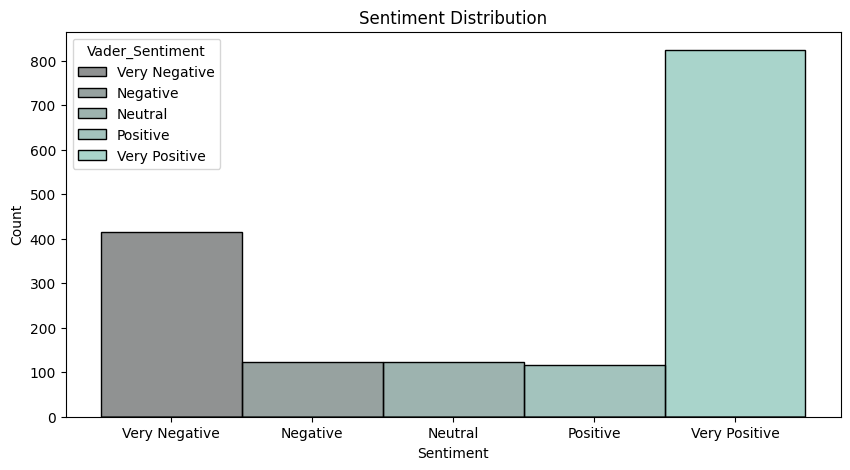

In [23]:
df['Vader_Sentiment'] = pd.Categorical(df['Vader_Sentiment'], ['Very Negative','Negative','Neutral','Positive', 'Very Positive'])

plt.figure(figsize=(10,5))
sns.histplot(data=df, x='Vader_Sentiment', palette='dark:#5A9', hue='Vader_Sentiment')
plt.xlabel(xlabel='Sentiment')
plt.title(label='Sentiment Distribution')

**4.6 Top 20 most frequent words**

Text(0.5, 1.0, 'Top 20 most frequent words')

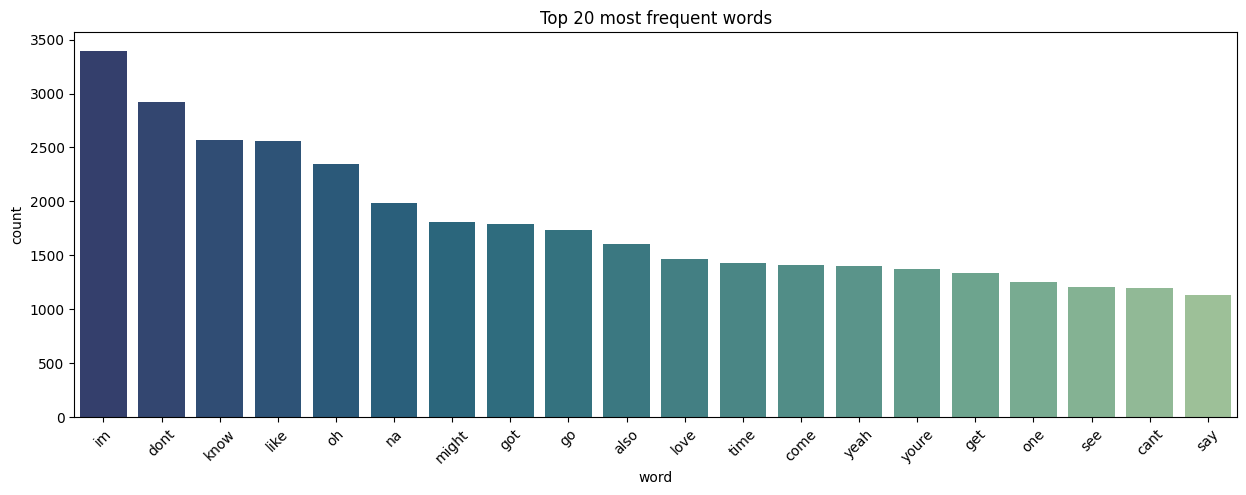

In [24]:
#Importing relevant library
from collections import Counter

#Calculating 20 most common words
word_count = Counter(" ".join(df["cleaned_"]).split()).most_common(20)

word_count = pd.DataFrame(word_count, columns=['word', 'count'])

#Visualizing using seaborn barplot
plt.figure(figsize=(15,5))
sns.barplot(data=word_count, x='word', y='count', palette='crest_r')
plt.xticks(rotation=45)
plt.title(label= 'Top 20 most frequent words')

**4.7 Correlation between sentiment ratings and sentiment scores**

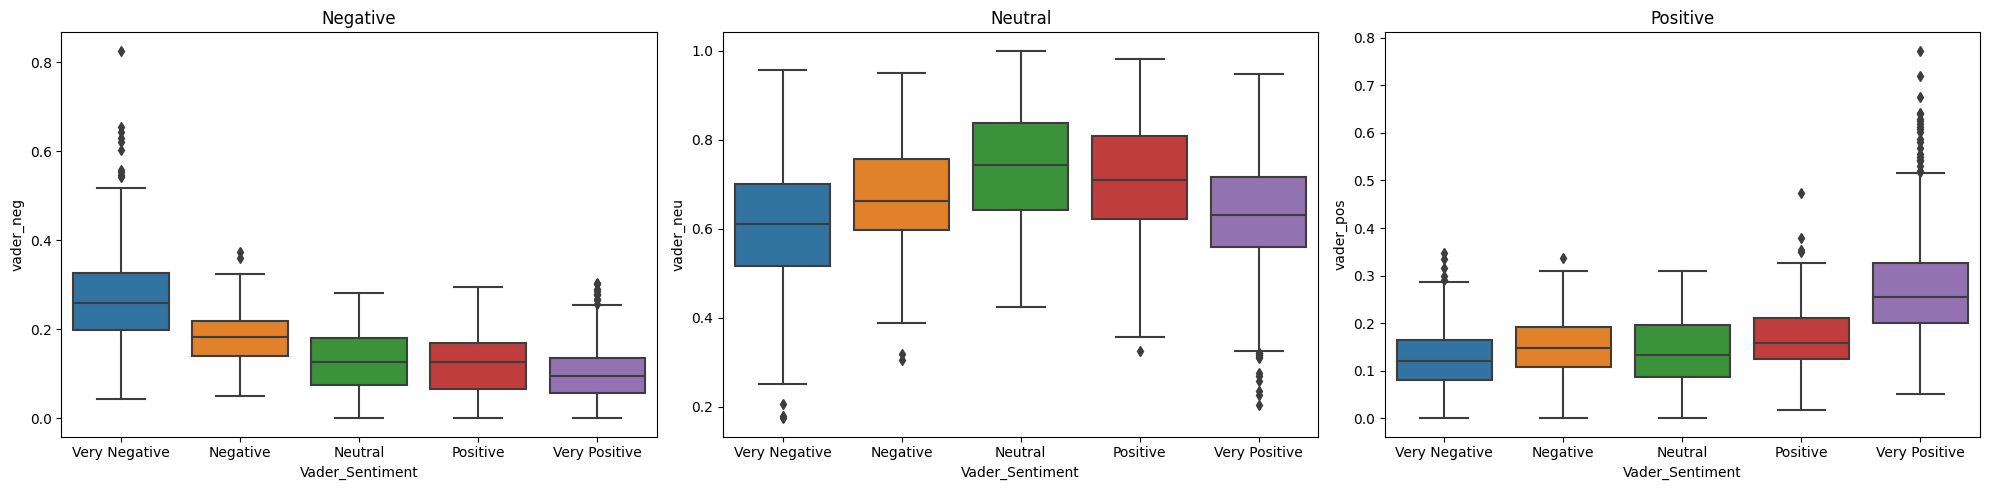

In [25]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(x='Vader_Sentiment', y='vader_neg', data=df, ax=axs[0])
sns.boxplot(x='Vader_Sentiment', y='vader_neu', data=df, ax=axs[1])
sns.boxplot(x='Vader_Sentiment', y='vader_pos', data=df, ax=axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.tight_layout()
plt.show()

## **5. Analysing text using Transformers RoBERTa model**

**5.1 Installing and Importing Transformers library**

In [28]:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 36.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 37.4 MB/s eta 0:00:00


In [32]:
#PyTorch is needed to run Transformers, run below code if you don't have PyTorch installed
# !pip install torch torchvision

#Importing functions from transformers library
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

**5.2 Pulling pre-trained RoBERTa model and assign it to a function**

In [33]:
#Pulling trained model (RoBERTa) and assigning it to a function
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

**5.3 Performing sentiment analysis using RoBERTa**

In [34]:
#Defining function to initiate RoBERTa and perform sentiment analysis
def roberta_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    score = output[0][0].detach().numpy()
    score = softmax(score)
    score_dict = {
        'roberta_neg': score[0],
        'roberta_neu': score[1],
        'roberta_pos': score[2]
    }
    return score_dict

In [35]:
#Creating empty dictionary
roberta_result = {}

#Iterrating rows
for index, row in df.iterrows():
    text = row['cleaned_']
    Id = index

    #Analysing text and saving the result in the empty dictionary created earlier
    roberta_result[Id] = roberta_scores(text)


RuntimeError: ignored

**5.4 Merging analysis result with the original dataset**

In [36]:
#Converting result dictionary to a pandas dataframe
roberta_result = pd.DataFrame(roberta_result).T

#Merging both dataset (roberta sentiment result + original dataset)
df = pd.concat([roberta_result, df], axis=1)


In [38]:
df

,roberta_neg,roberta_neu,roberta_pos,vader_neg,vader_neu,vader_pos,vader_compound,artist,title,cleaned_,Genre,Vader_Sentiment
0,0.632521,0.331843,0.035636,0.154,0.678,0.168,0.4311,The Strokes,The Adults Are Talking,sophisticated theyre complainin overeducated s...,Alternative Rock,Positive
1,0.155840,0.611813,0.232346,0.126,0.596,0.278,0.9638,The Strokes,Someday,old day someday someday yeah hurt say want sta...,Alternative Rock,Very Positive
2,0.381110,0.519479,0.099411,0.218,0.494,0.288,0.9399,The Strokes,Ode to the Mets,horse gon na wake anymore listen one time trut...,Alternative Rock,Very Positive
3,0.317349,0.527304,0.155347,0.135,0.711,0.154,0.6249,The Strokes,Reptilia,came tell u story know youre boring afraid wou...,Alternative Rock,Positive
4,0.384918,0.543223,0.071859,0.171,0.625,0.204,0.8955,The Strokes,Why Are Sundays So Depressing?,song paint picture baby gone dont miss like sw...,Alternative Rock,Very Positive
...,...,...,...,...,...,...,...,...,...,...,...,...
1603,NaN,NaN,NaN,0.242,0.574,0.183,-0.5149,Stone Temple Pilots,Wonderful,die morning would tell thing wouldnt would nav...,Alternative Rock,Negative
1604,NaN,NaN,NaN,0.370,0.616,0.014,-0.9967,Stone Temple Pilots,No Way Out,im suffocatin drowning im holding keep breathi...,Alternative Rock,Very Negative
1605,NaN,NaN,NaN,0.039,0.651,0.310,0.9816,Stone Temple Pilots,Dancing Days,summer evening grow got flower got power got w...,Alternative Rock,Very Positive
1606,NaN,NaN,NaN,0.305,0.505,0.190,-0.9794,Stone Temple Pilots,Sex & Violence,love dont care turn around youre everywhere ch...,Alternative Rock,Very Negative


<ipython-input-37-1ea879d9b1ca>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot =True, fmt='.2g', cmap = 'coolwarm')


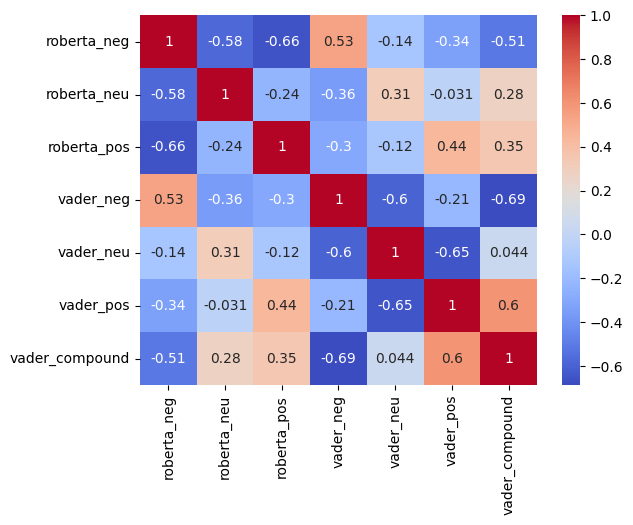

In [37]:
ax = sns.heatmap(df.corr(), annot =True, fmt='.2g', cmap = 'coolwarm')
plt.show()

In [6]:
df3 = pd.read_csv('tcc_ceds_music.csv')

In [8]:
df3.head(5)

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


<AxesSubplot: >

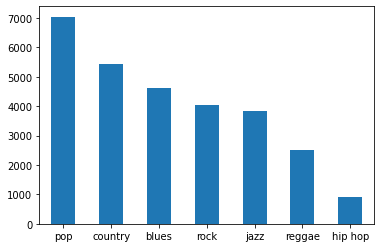

In [11]:
df3.genre.value_counts().plot.bar(rot=0)

In [17]:
df3.shape

(28372, 31)

In [15]:
new_df = df3[df3['genre'].isin(['rock', 'country', 'reggae', 'blues', 'pop', 'jazz'])]


In [18]:
new_df.shape

(27468, 31)

In [19]:
new_df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [20]:
new_df2 = new_df[new_df['len']>=55]

In [21]:
new_df2.shape

(16305, 31)

In [23]:
new_df2.genre.value_counts()

pop        4617
country    2865
blues      2432
rock       2279
jazz       2109
reggae     2003
Name: genre, dtype: int64

In [25]:
new_df2.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
5,14,perry como,round and round (with mitchell ayres and his o...,1950,pop,convoy light dead ahead merchantmen trump dies...,98,0.001053,0.420685,0.001053,...,0.128292,0.001053,0.689158,0.685588,0.898594,0.000000,0.768137,0.549535,violence,1.000000
6,15,freestyle,opm medley: when i met you,1950,pop,piece mindin world knowin life come bring give...,179,0.000483,0.000483,0.371817,...,0.000483,0.123150,0.368569,0.633695,0.435742,0.000000,0.282770,0.486470,world/life,1.000000
9,23,stélios kazantzídis,finito la mouzika,1950,pop,tear heart seat stay awhile tear heart game st...,61,0.001120,0.102548,0.001120,...,0.630507,0.001120,0.662082,0.643130,0.983936,0.000175,0.744435,0.413395,sadness,1.000000
10,28,liva weel,"drømmer man om den, vågner..",1951,pop,better sail midnight better dive pearl better ...,113,0.017090,0.026486,0.000774,...,0.000774,0.000774,0.625257,0.533113,0.972892,0.017004,0.691880,0.340320,obscene,0.985714
